# Choix des variables explicatives 

**But du notebook :** réaliser des tests statistiques sur les variables issues de Bloomberg afin d'identifier celles pertinentes pour la régression. 

Deux conditions à vérifier : 

$-$ La variable explicative doit être utile pour expliquer la variable à expliquer, c'est-à-dire que *PD_1y* (la proba de défaut à 1 an) doit être corrélée à la variable. 

$-$ Pas de doublons entre les variables explicatives. Les variables explicatives choisies doivent être peu corrélées entre elles. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/mathilde.binet/Desktop/PIF/2907/market_data_pd (3).csv',sep = ',')

In [4]:
df = df.drop(columns=['Issuer Name','Maturity','Unnamed: 0','Ask Price', 'Mid Price','Bid Price','Ticker_x','Ticker_y','Reference Security','Cpn'])

In [9]:
df 
#potentielles variables explicatives, et variable expliquée : PD_1y

,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
0,4.73005,4.84431,684.499,33.1593,NaN,NaN,NaN,87.2526,72.7382,275.5,NaN,NaN,0.995909
1,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.135456
2,18.91500,17.15800,351.535,60.3164,1.61252,70.221,NaN,77.8533,NaN,NaN,NaN,NaN,0.113669
3,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.636872
4,18.77330,19.24570,410.513,79.0061,NaN,NaN,3.78296,80.4119,NaN,NaN,NaN,NaN,0.319589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.097019
599,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.118316
600,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.083851
601,6.50472,6.05127,434.356,26.2841,NaN,NaN,NaN,79.4593,43.9004,58147.0,194.614,NaN,0.079718


# Observations des corrélations

In [80]:
corr_df = df.corr(method='spearman')
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                                          Average Equity / Average Assets  \
Average Equity / Average Assets                                  1.000000   
Common Eqty / Tot Assets                                         0.987812   
Debt / Common Equity                                            -0.689132   
Debt/Assets                                                      0.042793   
Debt/EBITDA                                                     -0.293401   
EBITDA                                                           0.041832   
Int Exp / Avg Int Bear Liab                                     -0.161346   
Tot Debt / Tot Capital                                          -0.720007   
Tot Loans to Tot Assets                                          0.568100   
Tot Risk-Based Cap                                              -0.272852   
Earnings Assets / Int Bear Liab                                 -0.301252   
Total Expenses to Average Earning Assets      

In [81]:
corr = abs(corr_df)

In [82]:
corr

,Average Equity / Average Assets,Common Eqty / Tot Assets,Debt / Common Equity,Debt/Assets,Debt/EBITDA,EBITDA,Int Exp / Avg Int Bear Liab,Tot Debt / Tot Capital,Tot Loans to Tot Assets,Tot Risk-Based Cap,Earnings Assets / Int Bear Liab,Total Expenses to Average Earning Assets,PD_1y
Average Equity / Average Assets,1.000000,0.987812,0.689132,0.042793,0.293401,0.041832,0.161346,0.720007,0.568100,0.272852,0.301252,NaN,0.055648
Common Eqty / Tot Assets,0.987812,1.000000,0.688037,0.027679,0.313084,0.113774,0.147853,0.722840,0.574501,0.285839,0.299045,NaN,0.049985
Debt / Common Equity,0.689132,0.688037,1.000000,0.464587,0.480710,0.059226,0.307918,0.989464,0.289152,0.081165,0.170163,NaN,0.132423
Debt/Assets,0.042793,0.027679,0.464587,1.000000,0.478818,0.143173,0.485322,0.496331,0.530347,0.500243,0.220211,NaN,0.169902
Debt/EBITDA,0.293401,0.313084,0.480710,0.478818,1.000000,0.394820,0.856492,0.447813,1.000000,NaN,0.220339,NaN,0.010598
EBITDA,0.041832,0.113774,0.059226,0.143173,0.394820,1.000000,0.419162,0.145824,0.221477,0.980861,0.019827,NaN,0.102042
Int Exp / Avg Int Bear Liab,0.161346,0.147853,0.307918,0.485322,0.856492,0.419162,1.000000,0.344274,0.530370,0.466124,0.011069,NaN,0.242200
Tot Debt / Tot Capital,0.720007,0.722840,0.989464,0.496331,0.447813,0.145824,0.344274,1.000000,0.229547,0.182815,0.147901,NaN,0.168726
Tot Loans to Tot Assets,0.568100,0.574501,0.289152,0.530347,1.000000,0.221477,0.530370,0.229547,1.000000,0.621060,0.316195,NaN,0.098127
Tot Risk-Based Cap,0.272852,0.285839,0.081165,0.500243,NaN,0.980861,0.466124,0.182815,0.621060,1.000000,0.259086,NaN,0.061028


Text(0.5, 1.0, 'Matrice de corrélation des variables')

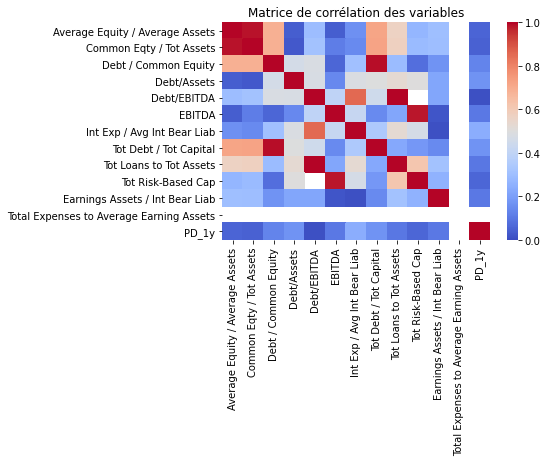

In [83]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=0.00, vmax=1,cmap='coolwarm')

plt.title('Matrice de corrélation des variables')

# Tests statistiques 

**3 tests identifiés : Pearson, Spearman et Kendall.**

Hypothèse $H_0$ *:* $\rho = 0$ *(indépendance). VS* $H_1$ *:*  $\rho \ne 0$ *(non indépendance)*

**p-value :** Si $\alpha_{obs} < \alpha_{seuil}$, on rejette l'hypothèse $H_0$ d'indépendance.

$-$ **Pearson :** suppose que les échantillons suivent une loi normale *(limite de ce test)*. Relation linéaire.

$-$ **Spearman & Kendall :** *ok* Relation monotone

In [14]:
from scipy import stats
from scipy.stats.stats import *

In [15]:
colonnes = ['Average Equity / Average Assets','Common Eqty / Tot Assets', 'Debt / Common Equity', 'Debt/Assets','Debt/EBITDA', 'EBITDA', 'Int Exp / Avg Int Bear Liab','Tot Debt / Tot Capital', 'Tot Loans to Tot Assets','Tot Risk-Based Cap', 'Earnings Assets / Int Bear Liab']

# I. Pertinence sur la variable à expliquer 

In [116]:
corr2= df.corr(method='kendall')
corr2["PD_1y"]

Average Equity / Average Assets             0.037501
Common Eqty / Tot Assets                    0.034609
Debt / Common Equity                        0.087558
Debt/Assets                                 0.115468
Debt/EBITDA                                -0.008844
EBITDA                                     -0.071462
Int Exp / Avg Int Bear Liab                 0.169135
Tot Debt / Tot Capital                      0.113483
Tot Loans to Tot Assets                     0.065864
Tot Risk-Based Cap                         -0.046118
Earnings Assets / Int Bear Liab             0.073846
Total Expenses to Average Earning Assets         NaN
PD_1y                                       1.000000
Name: PD_1y, dtype: float64

## a. Pearson

In [27]:
#PEARSON

print("TEST DE PEARSON")

for col in colonnes :
    
    print("###### \n ")
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.pearsonr(df_bis['PD_1y'],df_bis[col]))

TEST DE PEARSON
###### 
 
Average Equity / Average Assets
(-0.052511460953666766, 0.2163588020999092)
###### 
 
Common Eqty / Tot Assets
(-0.04809265053055147, 0.25375423627591376)
###### 
 
Debt / Common Equity
(-0.04622588036991425, 0.28314844538836065)
###### 
 
Debt/Assets
(0.10156955333309237, 0.015820303759649008)
###### 
 
Debt/EBITDA
(-0.0033633274967937573, 0.9562955409205232)
###### 
 
EBITDA
(0.017455110862805722, 0.744869405561009)
###### 
 
Int Exp / Avg Int Bear Liab
(0.19732645862977433, 0.04793824257364581)
###### 
 
Tot Debt / Tot Capital
(0.19804378587651655, 2.183559915605305e-06)
###### 
 
Tot Loans to Tot Assets
(0.07010248788907918, 0.34568524880537227)
###### 
 
Tot Risk-Based Cap
(-0.0016469276546923059, 0.9833017685641607)
###### 
 
Earnings Assets / Int Bear Liab
(0.1260517005237197, 0.09941901587503395)


**Observation des p-values :** Debt/Assets (1,6%), Int Exp / Avg Int Bear Liab (5%), Tot Debt / Tot Capital (0%), Earning Assets / Int Bear Liab (10%).

## b. Spearman 

In [29]:
#SPEARMAN

print("TEST DE SPEARMAN")

for col in colonnes :
    
    
    print("###### \n ")
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.spearmanr(df_bis['PD_1y'],df_bis[col]))

TEST DE SPEARMAN
###### 
 
Average Equity / Average Assets
SpearmanrResult(correlation=0.055647592294853644, pvalue=0.19012371182753607)
###### 
 
Common Eqty / Tot Assets
SpearmanrResult(correlation=0.04998547726270073, pvalue=0.23552297515060172)
###### 
 
Debt / Common Equity
SpearmanrResult(correlation=0.1324234436076026, pvalue=0.0020248029279437154)
###### 
 
Debt/Assets
SpearmanrResult(correlation=0.16990245287339445, pvalue=5.0020730950972966e-05)
###### 
 
Debt/EBITDA
SpearmanrResult(correlation=-0.0105977257636686, pvalue=0.8628981258438274)
###### 
 
EBITDA
SpearmanrResult(correlation=-0.10204218000964277, pvalue=0.056496477280421675)
###### 
 
Int Exp / Avg Int Bear Liab
SpearmanrResult(correlation=0.242200351152311, pvalue=0.014677708967482068)
###### 
 
Tot Debt / Tot Capital
SpearmanrResult(correlation=0.16872608895606983, pvalue=5.7351261720105745e-05)
###### 
 
Tot Loans to Tot Assets
SpearmanrResult(correlation=0.09812747722544617, pvalue=0.18632145896961047)
###### 


**Observations des p-values :** Debt / Common Equity (0%), Debt / Assets (0%), EBITDA (6%), Int Exp / Avg Int Bear Liab (1%), Tot Debt / Tot Capital (0%) 

## c. Kendall 

In [30]:
#KENDALL

print("TEST DE KENDALL")

for col in colonnes :
    
    print("###### \n ") 
    
    df_bis = df[['PD_1y',col]].dropna(how = 'any') 
    
    print(col)
    print(stats.kendalltau(df_bis['PD_1y'],df_bis[col]))

TEST DE KENDALL
###### 
 
Average Equity / Average Assets
KendalltauResult(correlation=0.037501300235279166, pvalue=0.18890166367447492)
###### 
 
Common Eqty / Tot Assets
KendalltauResult(correlation=0.03460870208970893, pvalue=0.22149651962001604)
###### 
 
Debt / Common Equity
KendalltauResult(correlation=0.08755807946302215, pvalue=0.002489463598752673)
###### 
 
Debt/Assets
KendalltauResult(correlation=0.11546833261799318, pvalue=4.601438675010301e-05)
###### 
 
Debt/EBITDA
KendalltauResult(correlation=-0.00884446089332952, pvalue=0.8304098426519779)
###### 
 
EBITDA
KendalltauResult(correlation=-0.07146164007603147, pvalue=0.04753577281215056)
###### 
 
Int Exp / Avg Int Bear Liab
KendalltauResult(correlation=0.16913465180227877, pvalue=0.015065157799219913)
###### 
 
Tot Debt / Tot Capital
KendalltauResult(correlation=0.11348265843381361, pvalue=6.29991555973169e-05)
###### 
 
Tot Loans to Tot Assets
KendalltauResult(correlation=0.06586385970496578, pvalue=0.20063959088597416)
#

**Observation des p-values :** Debt / Common Equity (0%), Debt / Assets (0%), EBITDA (5%), Int Exp / Avg Int Bear Liab (2%), Tot Debt / Tot Capital (0%).

**CONCLUSION**

On compare les résultats des 3 tests. Les variables qu'on retient sont celles pour lesquelles on rejette l'hypothèse d'indépendance avec la variable expliquée, ie celles avec une p-value très faible.

On choisit **Debt / Common Equity, Debt / Assets, EBITDA, Int Exp / Avg Int Bear Liab et Tot Debt / Tot Capital**.

# II. Corrélations entre variables explicatives

In [34]:
var = df[["Debt / Common Equity","Debt/Assets","EBITDA","Int Exp / Avg Int Bear Liab","Tot Debt / Tot Capital"]]

In [43]:
colonnes2 = ['Debt / Common Equity', 'Debt/Assets', 'EBITDA', 'Int Exp / Avg Int Bear Liab', 'Tot Debt / Tot Capital']

In [38]:
var.isnull().sum(axis = 0)

Debt / Common Equity            52
Debt/Assets                     29
EBITDA                         243
Int Exp / Avg Int Bear Liab    502
Tot Debt / Tot Capital          30
dtype: int64

Problème des valeurs manquantes : *Int Exp / Avg Int Bear Liab*  et *EBITDA* ont énormèment de valeurs manquantes. Cela sera problématique ensuite pour le réseau de neurones.

## 1) en gardant toutes les variables

In [84]:
corr_var = var.corr(method='spearman')
print("The correlation DataFrame is:")
print(corr_var, "\n")

The correlation DataFrame is:
                             Debt / Common Equity  Debt/Assets    EBITDA  \
Debt / Common Equity                     1.000000     0.464587 -0.059226   
Debt/Assets                              0.464587     1.000000 -0.143173   
EBITDA                                  -0.059226    -0.143173  1.000000   
Int Exp / Avg Int Bear Liab              0.307918     0.485322  0.419162   
Tot Debt / Tot Capital                   0.989464     0.496331 -0.145824   

                             Int Exp / Avg Int Bear Liab  \
Debt / Common Equity                            0.307918   
Debt/Assets                                     0.485322   
EBITDA                                          0.419162   
Int Exp / Avg Int Bear Liab                     1.000000   
Tot Debt / Tot Capital                          0.344274   

                             Tot Debt / Tot Capital  
Debt / Common Equity                       0.989464  
Debt/Assets                                0

Text(0.5, 1.0, 'Matrice de corrélation des variables')

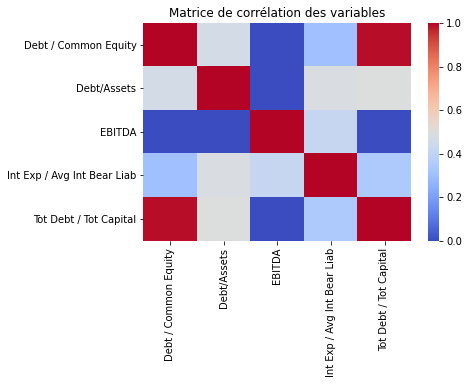

In [85]:
sns.heatmap(corr_var, xticklabels=corr_var.columns, yticklabels=corr_var.columns, vmin=0.00, vmax=1,cmap='coolwarm')

plt.title('Matrice de corrélation des variables')

## a. Spearman

In [60]:
print("TEST DE SPEARMAN")

for col1 in colonnes2 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes2 : 
        
        if col1 != col2 :
    
            df_bis = var[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.spearmanr(df_bis[col1],df_bis[col2]))

TEST DE SPEARMAN

##############################

VAR = Debt / Common Equity
----
Debt/Assets
SpearmanrResult(correlation=0.4645868419138533, pvalue=7.516494780251343e-31)
----
EBITDA
SpearmanrResult(correlation=-0.059226499202730376, pvalue=0.2775738660485171)
----
Int Exp / Avg Int Bear Liab
SpearmanrResult(correlation=0.3079175330225566, pvalue=0.0018297887044373595)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=0.9894636817891669, pvalue=0.0)

##############################

VAR = Debt/Assets
----
Debt / Common Equity
SpearmanrResult(correlation=0.4645868419138533, pvalue=7.516494780251343e-31)
----
EBITDA
SpearmanrResult(correlation=-0.14317339973441112, pvalue=0.006506328617078773)
----
Int Exp / Avg Int Bear Liab
SpearmanrResult(correlation=0.4853217106927117, pvalue=2.6923903275636027e-07)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=0.4963314711543589, pvalue=5.730016879289545e-37)

##############################

VAR = EBITDA
----
Debt / Common Equity
Spe

Doublon entre debt/common equity et tot debt / tot capital. 

## b. Kendall

In [62]:
print("TEST DE KENDALL")

for col1 in colonnes2 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes2 : 
        
        if col1 != col2 :
    
            df_bis = var[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.kendalltau(df_bis[col1],df_bis[col2]))

TEST DE KENDALL

##############################

VAR = Debt / Common Equity
----
Debt/Assets
KendalltauResult(correlation=0.34766051146821236, pvalue=2.238201085904255e-33)
----
EBITDA
KendalltauResult(correlation=-0.0324435318275154, pvalue=0.3811150359551062)
----
Int Exp / Avg Int Bear Liab
KendalltauResult(correlation=0.19391304347826085, pvalue=0.007235034623848596)
----
Tot Debt / Tot Capital
KendalltauResult(correlation=0.938613105954636, pvalue=1.0432283803425387e-231)

##############################

VAR = Debt/Assets
----
Debt / Common Equity
KendalltauResult(correlation=0.34766051146821236, pvalue=2.238201085904255e-33)
----
EBITDA
KendalltauResult(correlation=-0.0988562091503268, pvalue=0.005793077628004386)
----
Int Exp / Avg Int Bear Liab
KendalltauResult(correlation=0.3374468085106383, pvalue=2.5568202677801747e-06)
----
Tot Debt / Tot Capital
KendalltauResult(correlation=0.36699187595058796, pvalue=1.7741008274622337e-38)

##############################

VAR = EBITDA
--

## 2) en ne gardant que les variables avec peu de NaN

In [63]:
var2 = df[["Debt / Common Equity","Debt/Assets","Tot Debt / Tot Capital"]]

Text(0.5, 1.0, 'Matrice de corrélation des variables')

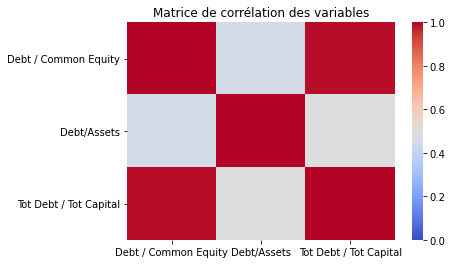

In [89]:
corr_var2 = var2.corr(method='spearman')
sns.heatmap(corr_var2, xticklabels=corr_var2.columns, yticklabels=corr_var2.columns, vmin=0.00, vmax=1,cmap='coolwarm')
plt.title('Matrice de corrélation des variables')

In [68]:
colonnes3 = ['Debt / Common Equity', 'Debt/Assets', 'Tot Debt / Tot Capital']

print("TEST DE SPEARMAN")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.spearmanr(df_bis[col1],df_bis[col2]))

TEST DE SPEARMAN

##############################

VAR = Debt / Common Equity
----
Debt/Assets
SpearmanrResult(correlation=0.4645868419138533, pvalue=7.516494780251343e-31)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=0.9894636817891669, pvalue=0.0)

##############################

VAR = Debt/Assets
----
Debt / Common Equity
SpearmanrResult(correlation=0.4645868419138533, pvalue=7.516494780251343e-31)
----
Tot Debt / Tot Capital
SpearmanrResult(correlation=0.4963314711543589, pvalue=5.730016879289545e-37)

##############################

VAR = Tot Debt / Tot Capital
----
Debt / Common Equity
SpearmanrResult(correlation=0.9894636817891669, pvalue=0.0)
----
Debt/Assets
SpearmanrResult(correlation=0.4963314711543589, pvalue=5.730016879289545e-37)


In [70]:
print("TEST DE KENDALL")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.kendalltau(df_bis[col1],df_bis[col2]))

TEST DE KENDALL

##############################

VAR = Debt / Common Equity
----
Debt/Assets
KendalltauResult(correlation=0.34766051146821236, pvalue=2.238201085904255e-33)
----
Tot Debt / Tot Capital
KendalltauResult(correlation=0.938613105954636, pvalue=1.0432283803425387e-231)

##############################

VAR = Debt/Assets
----
Debt / Common Equity
KendalltauResult(correlation=0.34766051146821236, pvalue=2.238201085904255e-33)
----
Tot Debt / Tot Capital
KendalltauResult(correlation=0.36699187595058796, pvalue=1.7741008274622337e-38)

##############################

VAR = Tot Debt / Tot Capital
----
Debt / Common Equity
KendalltauResult(correlation=0.938613105954636, pvalue=1.0432283803425387e-231)
----
Debt/Assets
KendalltauResult(correlation=0.36699187595058796, pvalue=1.7741008274622337e-38)


In [71]:
#PEARSON

print("TEST DE PEARSON")

for col1 in colonnes3 :
    print("\n##############################\n")
    print("VAR = " + col1)
    for col2 in colonnes3 : 
        
        if col1 != col2 :
    
            df_bis = var2[[col1,col2]].dropna(how = 'any') 
        
            print("----")
            print(col2)
            print(stats.pearsonr(df_bis[col1],df_bis[col2]))

TEST DE PEARSON

##############################

VAR = Debt / Common Equity
----
Debt/Assets
(0.2832941542909957, 1.2524136307374453e-11)
----
Tot Debt / Tot Capital
(0.17631555675872804, 3.155083148855142e-05)

##############################

VAR = Debt/Assets
----
Debt / Common Equity
(0.2832941542909957, 1.2524136307374453e-11)
----
Tot Debt / Tot Capital
(0.22806760083608657, 3.383365039436516e-08)

##############################

VAR = Tot Debt / Tot Capital
----
Debt / Common Equity
(0.17631555675872804, 3.155083148855142e-05)
----
Debt/Assets
(0.22806760083608657, 3.383365039436516e-08)


ccl : debt / common equity et tot debt / tot capital sont bcp corrélés entre eux

# Autres fonctions

In [72]:
#renvoyer tous les duos avec une corrélation au dessus d'un certain seuil 

def high_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] > seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 

In [73]:
def low_corr(corr_df, seuil) : 
    
    duos = []
    
    col = np.array(corr_df.columns) 
    corr = corr_df.to_numpy()
    corr = np.abs(corr)
    
    for i in range(0,len(corr)) : 
        for j in range(0,i) : 
            
            if corr[i][j] <= seuil : 
                
                duos.append(col[i] + " AND " + col[j]) 
                
    return duos 